In todays notebook, I used relaxation functions to try and plot a faraday cage, and use quiver plots to try and study electric fields. The main goal was to try to understand hwo faraday cages work.

I first started by creating a faraday cage with eight points grounded, then a cage with four corners grounded, then a cage with 4 points on the sides grounded, and then finally I created a cage with all points on the sides grounded. I used the electric fields to try and understand how current worked in the cages, and which setup was most optimal for a safe faraday cage.

In [0]:
# Import commands
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits import mplot3d # To make 3d plots
from matplotlib import cm # For the color map
import plotly.figure_factory as ff # To make quiver plots
from random import *

In [0]:
def relax(Nrows,Ncols,tol,flag):  # This will be our main function
  # Nrows is the number of rows in the matrix
  # Ncols is the number of columns in the matrix
  # tol is the tolerance limit for the relaxation loop
  mat = np.zeros((Nrows,Ncols)) # Initialize the matrix
  mat = SetBounds(mat,flag) # Set the boundary conditions (you write this function)
  #mat = FillInStart(mat) 
  diff = tol + 1 # Set diff so the loop will start
  tstart = time.time()
  PlotMyMatrix(mat,25,25) #here we plot the matrix before relaxation for a better comparison
  while(diff>tol): # This is our convergence loop
    newmat = relaxstepshift(mat) # You should write this.
    newmat = SetBounds(newmat,flag) # Reset the boundaries, just in case
    diff = np.max(np.abs(mat-newmat)) # Get the maximum change from the last loop to this
    mat = np.copy(newmat) # Overwrite mat with the new matrix and restart loop
  tend = time.time()
  telapsed = tend-tstart
  return(mat,telapsed)  # Once convergence is complete, return the final relaxed matrix

In [0]:
def PlotMyMatrix(m,elev,azim): 
  # This function will plot a given matrix, from the perspective
  # Of the two given angles.
  msz = np.shape(m)
  x = np.arange(msz[0])
  y = np.arange(msz[1])
  X,Y = np.meshgrid(x,y)
  fig = plt.figure(figsize=(7,7))
  ax = plt.axes(projection='3d')
  surf = ax.plot_surface(X, Y, m, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
  ax.view_init(elev, azim)
  plt.show()

In [0]:
def QuiverPlot(m,delt):
  # This function will make a quiver plot of the slopes of your relaxed matrix
  # m is the matrix you want to plot, and delt is the number of elements you want to skip
  nrows,ncols = np.shape(m)
  # First, downsample the matrix, because it's probably too big
  newrows = int(nrows/delt)+1
  newcols = int(ncols/delt)+1
  newmat = np.zeros((newrows,newcols))
  for i in np.arange(newrows):
    for j in np.arange(newcols):
      nr = i*delt-1
      nc = j*delt-1
      if nr<0:
        nr = 0
      if nc<0:
        nc = 0
      newmat[i,j] = m[nr,nc]
  # Now, establish the x,y coordinates
  x,y = np.meshgrid(np.arange(newrows), np.arange(newcols))
  # Take the gradient (points uphill)
  v, u = np.gradient(newmat)
  # Plot the negative gradient to point downhill
  fig = ff.create_quiver(x, y, -u, -v,
                       scale=0.5,
                       arrow_scale=.4,
                       name='slope',
                       line_width=1)
  fig.show()

In [0]:
def FillInStart(m): #fills in matrix
  mout = np.copy(m) # copies the input array
  maxvalue = np.amax(m) # max value of of array is saved as maxvalue
  minvalue = np.amin(m) #min value of of array is saved as minvalue
  Nrows,Ncols = np.shape(m)
  #random values are chosen between min and max 
  for i in range((Nrows-2)):
    for j in range((Ncols-2)):
      mout[i+1,j+1] = np.random.randint(minvalue, maxvalue)
  return(mout)

def relaxstepshift(m):
  # This function should make four copies of m, each shifted by one element in each direction
  # Then average the four to get the output matrix
  m1 = np.copy(m)
  m2 = np.copy(m)
  m3 = np.copy(m)
  m4 = np.copy(m)
  m5 = np.copy(m)
  Nrows, Ncols = np.shape(m)
  m1[0:Nrows-1,:] = m[1:Nrows,:]
  m2[1:Nrows,:] = m[0:Nrows-1,:]
  m3[:,0:Ncols-1] = m[:, 1:Ncols]
  m4[:, 1:Ncols] = m[:, 0:Ncols-1]

  mout = (m1 + m2 + m3 +m4)/4
  return(mout) 

In [0]:
def SetBounds(m,flag):    
  # one side high, one side low (I used the reccomended 10 & -10)
  msz = np.shape(m)
  m[0,:] = np.linspace(-10,10,msz[0])
  m[:,0] = -10 
  m[msz[0]-1,:] = np.linspace(-10,10,msz[0])
  m[:,msz[1]-1] = 10
  if (flag == 1):
    #sets eight given points to zero
    m[int(msz[0]/3)-1, int(msz[1]/3)-1] = 0 
    m[int(msz[0]/2)-1, int(msz[1]/3)-1] = 0
    m[int(msz[0]*2/3)-1, int(msz[1]/3)-1] = 0
    m[int(msz[0]/3)-1, int(msz[1]/2)-1] = 0
    m[int(msz[0]/3)-1, int(msz[1]*2/3)-1] = 0
    m[int(msz[0]/2)-1, int(msz[1]*2/3)-1] = 0
    m[int(msz[1]*2/3)-1, int(msz[1]/2)-1] = 0
    m[int(msz[1]*2/3)-1, int(msz[1]*2/3)-1] = 0
  if (flag == 2):
    #sets 4 corners to zero
    m[int(msz[0]/3)-1, int(msz[1]/3)-1] = 0 
    m[int(msz[0]*2/3)-1, int(msz[1]/3)-1] = 0
    m[int(msz[0]/3)-1, int(msz[1]*2/3)-1] = 0
    m[int(msz[1]*2/3)-1, int(msz[1]*2/3)-1] = 0
  if (flag == 3):
    #sets 4 points along sides to zero
    m[int(msz[0]/3)-1, int(msz[1]/2)-1] = 0
    m[int(msz[0]/2)-1, int(msz[1]/3)-1] = 0
    m[int(msz[0]/2)-1, int(msz[1]*2/3)-1] = 0
    m[int(msz[1]*2/3)-1, int(msz[1]/2)-1] = 0
  if (flag == 4):
    m[int((msz[0])/3)-1, int((msz[0])/3)-1:int((msz[0])*2/3)] = 0 #60x60 matrix, values in columns 20 to 40, in row 20, are set to zero
    m[int((msz[0])*2/3)-1, int((msz[0])/3) - 1:int((msz[0])*2/3)] = 0 #60x60 matrix, values in columns 20 to 40, in row 40, are set to zero
    m[int((msz[0])/3) - 1:int((msz[0])*2/3), int((msz[0])/3)-1] = 0 #60x60 matrix, values in rows 20 to 40, in column 20, are set to zero
    m[int((msz[0])/3) - 1:int((msz[0])*2/3) , int((msz[0])*2/3)-1] = 0 #60x60 matrix, values in rows 20 to 40, in column 40, are set to zero
  return(m)

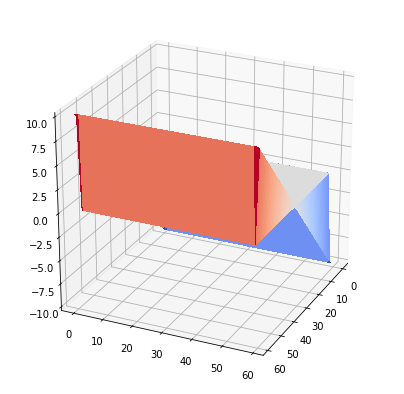

Elapsed time =  1.0858197212219238


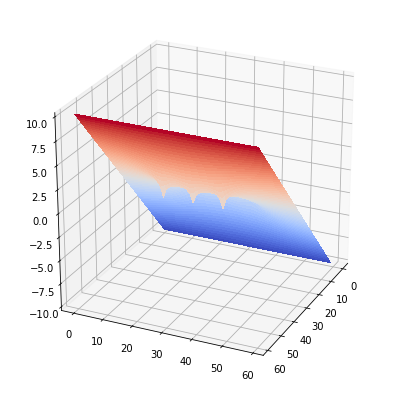

In [0]:
#plotting flag 1
laplace,telap = relax(60,60,1E-10,1)
print("Elapsed time = ",telap)
PlotMyMatrix(laplace,25,25)

QuiverPlot(laplace,5)

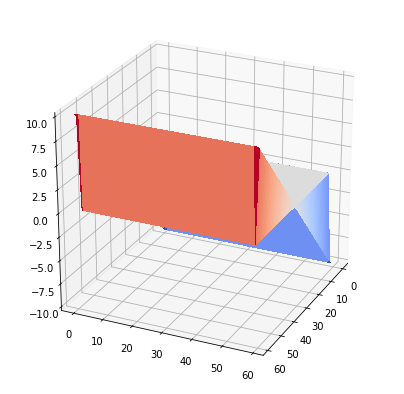

Elapsed time =  1.2119648456573486


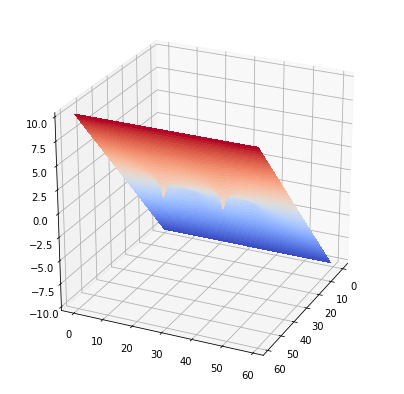

In [0]:
#plotting flag 2
laplace,telap = relax(60,60,1E-10,2)
print("Elapsed time = ",telap)
PlotMyMatrix(laplace,25,25)

QuiverPlot(laplace,5)

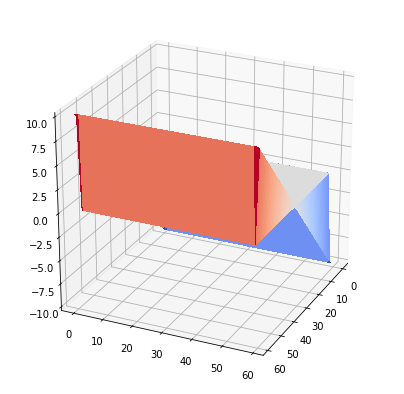

Elapsed time =  1.201146125793457


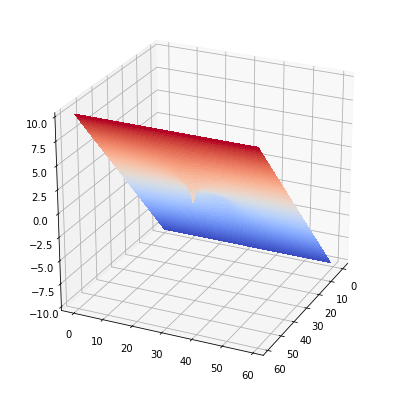

In [0]:
#plotting flag 3
laplace,telap = relax(60,60,1E-10,3)
print("Elapsed time = ",telap)
PlotMyMatrix(laplace,25,25)

QuiverPlot(laplace,5)

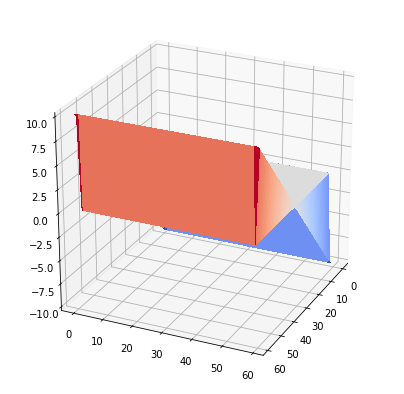

Elapsed time =  0.8848922252655029


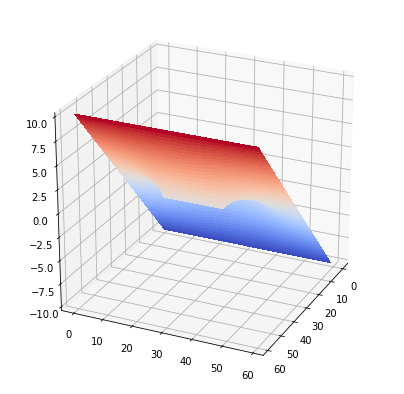

In [0]:
#plotting flag 4
laplace,telap = relax(60,60,1E-10,4)
print("Elapsed time = ",telap)
PlotMyMatrix(laplace,25,25)

QuiverPlot(laplace,5)

I first set my boundary values to be a tilted square. For the first problem, I made eight points along the "faraday cage" equal to zero, essentially making the potential at these point zero. I then used the previously made relaxation function to plot this. The quiver plot that resulted was the electric field. For the first one, as you can see, some of the current still passes through the middle. This would be a bad faraday cage, as anyone inside would get electrocuted.

I then plotted a "cage" with the four corners grounded. I expected it to be worse than the first one, as less points were being grounded. My hypothesis was correct, more arrows can be seen going through the middle, more current is passing through the middle. This is dangerous, and is a bad faraday cage. 

For the third one I made 4 side point grounded. Once again, I hypothesized that it would be worse than the first plot, but I wasn't sure how it would compare to the second plot. I found that the third plot has a smaller area where a gap is noticable, and the arrows are more condensed, meaning a high current would flow through, making the faraday cage dangerous.

For the fourth and final plot, I made all the points on the sides grounded, or equal to zero. I hypothesized that this would be the best faraday cage, and that no current would go through the middle. I was right, in the electric field you can see that no current is flowing through. This is a good faraway cage.
